In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [29]:
import os
os.getcwd()

'/Users/sushmitarajan/econ470spring2025/Homework2'

In [23]:
final_hcris = pd.read_csv('/Users/sushmitarajan/econ470spring2025/Homework2/submission1/data/output/HCRIS_Data.csv')

# my github repository- 

In [24]:
final_hcris.describe()
final_hcris.head()

,provider_number,fy_start,fy_end,date_processed,date_created,beds,tot_charges,tot_discounts,tot_operating_exp,ip_charges,...,secondary_mcare_payment,street,city,state,zip,county,hvbp_payment,hrrp_payment,year,source
0,10001,1997-10-01,1998-09-30,2002-08-01,2001-06-27,425.0,3.048881e+08,1.489623e+08,133530676.0,37559906.0,...,60111.0,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301-,HOUSTON,NaN,NaN,1998,unique reports
1,10001,2010-10-01,2011-09-30,2012-11-09,2012-11-09,408.0,1.208332e+09,9.577269e+08,267292928.0,110484675.0,...,35367.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,unique reports
2,10001,2011-10-01,2012-09-30,2013-11-15,2013-11-15,408.0,1.263056e+09,1.008222e+09,274011907.0,116037225.0,...,55155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,unique reports
3,10001,2012-10-01,2013-09-30,2014-09-26,2014-03-17,408.0,1.305720e+09,1.043723e+09,284850485.0,76820374.0,...,58522.0,NaN,NaN,NaN,NaN,NaN,-101118.0,NaN,2013,unique reports
4,10001,2013-10-01,2014-09-30,2015-03-13,2015-03-11,398.0,1.451186e+09,1.160976e+09,313050295.0,129439329.0,...,56453.0,NaN,NaN,NaN,NaN,NaN,68134.0,NaN,2014,unique reports


1. How many hospitals filed more than one report in the same year? Show your answer as a line graph of the number of hospitals over time.

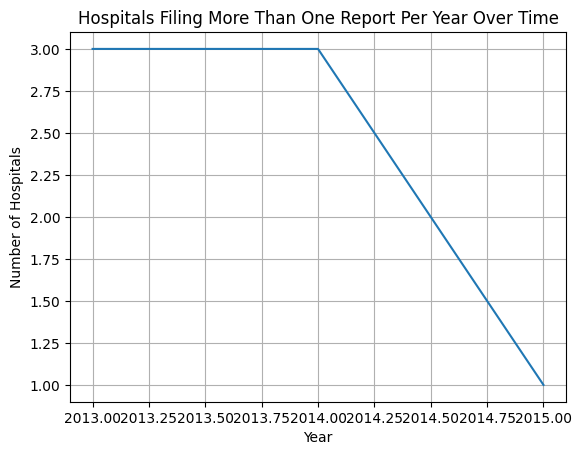

In [25]:
# Count hospitals that filed more than one report in the same year
duplicate_hcris = final_hcris.groupby(['provider_number', 'year']).size().reset_index(name='report_count')
duplicate_hcris =duplicate_hcris[duplicate_hcris['report_count'] > 1]

#Unique number of hospitals
count = duplicate_hcris.groupby('year')['provider_number'].nunique()

# Plot the results
plt.figure()
plt.plot(count.index, count.values)
plt.xlabel('Year')
plt.ylabel('Number of Hospitals')
plt.title('Hospitals Filing More Than One Report Per Year Over Time')
plt.grid(True)
plt.show()


2. After removing/combining multiple reports, how many unique hospital IDs (Medicare provider numbers) exist in the data?

In [13]:
# Unique Hospital Count After Removing Multiple Reports
unique_hospitals = final_hcris['provider_number'].nunique()
print(f"Total Unique Hospitals: {unique_hospitals}")

Total Unique Hospitals: 8812


3. What is the distribution of total charges (tot_charges in the data) in each year? Show your results with a “violin” plot, with charges on the y-axis and years on the x-axis. 

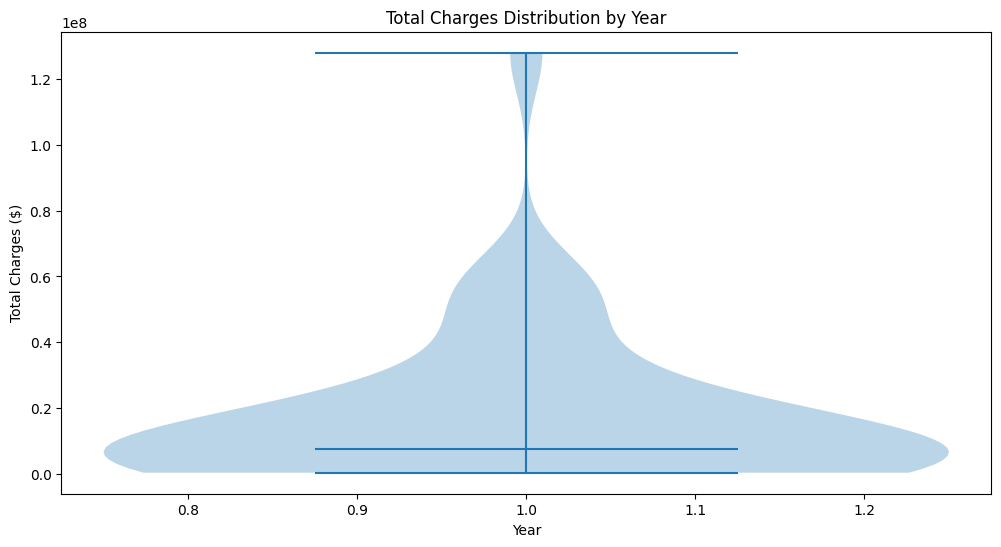

In [14]:
years = sorted(final_hcris['year'].dropna().unique())
df_tot_charges = [final_hcris[final_hcris['year'] == y]['tot_charges'] for y in years]
# Plot
plt.figure(figsize=(12, 6))
plt.violinplot(df_tot_charges, showmedians=True)
plt.xlabel('Year')
plt.ylabel('Total Charges ($)')
plt.title('Total Charges Distribution by Year')

plt.show()

4.What is the distribution of estimated prices in each year? Again present your results with a violin plot, and recall our formula for estimating prices from class. Be sure to do something about outliers and/or negative prices in the data.



ValueError: zero-size array to reduction operation minimum which has no identity

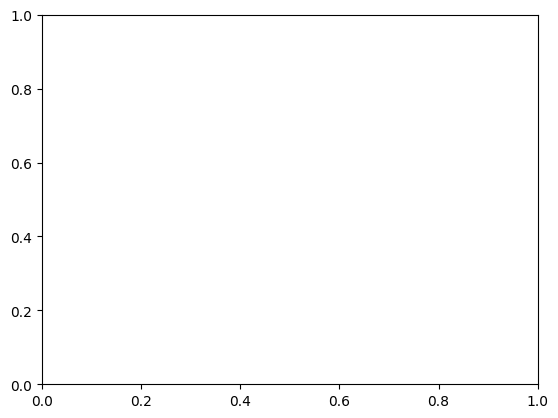

In [15]:
final_hcris['discount_factor'] = 1 - final_hcris['tot_discounts'] / final_hcris['tot_charges']
final_hcris['price_num'] = (final_hcris['ip_charges'] + final_hcris['icu_charges'] + final_hcris['ancillary_charges']) * final_hcris['discount_factor'] - final_hcris['tot_mcare_payment']
final_hcris['price_denom'] = final_hcris['tot_discharges'] - final_hcris['mcare_discharges']
final_hcris['estimated_price'] = final_hcris['price_num'] / final_hcris['price_denom']

#emove negative and extreme outlier values
# Calculate mean and standard deviation
mean_price = final_hcris['estimated_price'].mean()
std_price = final_hcris['estimated_price'].std()

# Define lower and upper bounds for outlier removal (3 standard deviations from mean)
lower_bound = mean_price - (3 * std_price)
upper_bound = mean_price + (3 * std_price)

# Remove negative values
final_hcris = final_hcris[final_hcris['estimated_price'] > 0]

# Remove outliers
final_hcris = final_hcris[(final_hcris['estimated_price'] >= lower_bound) & (final_hcris['estimated_price'] <= upper_bound)]
years = sorted(final_hcris['year'].dropna().unique())
estimated_price_df = [final_hcris[final_hcris['year'] == y]['estimated_price'] for y in years]
ep_years = sorted(final_hcris['year'].dropna().unique())

# Plot
plt.figure()
plt.violinplot(estimated_price_df, showmedians=True)
plt.xticks(range(1, len(ep_years) + 1), ep_years, rotation=45)
plt.xlabel('Year')
plt.ylabel('Estimated Price ($)')
plt.title('Estimated Price Distribution by Year')
plt.yscale('log')  # Log scale for better visualization
plt.show()

5. Calculate the average price among penalized versus non-penalized hospitals.

In [ ]:
# Ensure fyear is integer
final_hcris['fyear'] = pd.to_numeric(final_hcris['year'], errors='coerce')

# Filter data for 2012
hcris_2012 = final_hcris[(finally['year'] == 2012) & (hcris_data['beds'] > 30)].copy()

# Recalculate price after filtering
hcris_2012['discount_factor'] = 1 - (hcris_2012['tot_discounts'] / hcris_2012['tot_charges'])
hcris_2012['price_num'] = (hcris_2012['ip_charges'] + hcris_2012['icu_charges'] + hcris_2012['ancillary_charges']) * hcris_2012['discount_factor'] - hcris_2012['tot_mcare_payment']
hcris_2012['price_denom'] = hcris_2012['tot_discharges'] - hcris_2012['mcare_discharges']
hcris_2012['price'] = hcris_2012['price_num'] / hcris_2012['price_denom']

# Ensure denominator is valid (avoid division by zero or negative values)
hcris_2012 = hcris_2012[hcris_2012['price_denom'] > 0]

# Compute price only for valid rows
hcris_2012['price'] = hcris_2012['price_num'] / hcris_2012['price_denom']

# Drop remaining invalid rows
hcris_2012 = hcris_2012.replace([np.inf, -np.inf], np.nan).dropna(subset=['price'])

# Take absolute value of HRRP
hcris_2012['hrrp_payment'] = hcris_2012['hrrp_payment'].abs()

# Ensure penalty calculation works
hcris_2012['hvbp_payment'] = hcris_2012['hvbp_payment'].fillna(0)
hcris_2012['hrrp_payment'] = hcris_2012['hrrp_payment'].fillna(0).abs()

# Define Penalty Variable (penalized = True if sum of payments is negative)
hcris_2012['penalty'] = (hcris_2012['hvbp_payment'] - hcris_2012['hrrp_payment']) < 0

# Compute Mean Price by Penalty
mean_price_penalized = round(hcris_2012[hcris_2012['penalty']]['price'].mean(), 2)
mean_price_non_penalized = round(hcris_2012[~hcris_2012['penalty']]['price'].mean(), 2)

print(f"Mean Price - Penalized Hospitals: {mean_price_penalized}")
print(f"Mean Price - Non-Penalized Hospitals: {mean_price_non_penalized}")

SyntaxError: invalid syntax (133218044.py, line 5)

6. Split hospitals into quartiles based on bed size. To do this, create 4 new indicator variables, where each variable is set to 1 if the hospital’s bed size falls into the relevant quartile. Provide a table of the average price among treated/control groups for each quartile.

7. Find the average treatment effect using each of the following estimators, and present your results in a single table:

Nearest neighbor matching (1-to-1) with inverse variance distance based on quartiles of bed size
Nearest neighbor matching (1-to-1) with Mahalanobis distance based on quartiles of bed size
Inverse propensity weighting, where the propensity scores are based on quartiles of bed size
Simple linear regression, adjusting for quartiles of bed size using dummy variables and appropriate interactions as discussed in class

8. With these different treatment effect estimators, are the results similar, identical, very different?



9. Do you think you’ve estimated a causal effect of the penalty? Why or why not? (just a couple of sentences)

10. Briefly describe your experience working with these data (just a few sentences). Tell me one thing you learned and one thing that really aggravated or surprised you.

In [ ]:

!jupyter nbconvert --to pdf--output homework2.pdf "/Users/sushmitarajan/econ470spring2025/Homework2/analysis.ipynb"

126159.69s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
[NbConvertApp] Converting notebook /Users/sushmitarajan/econ470spring2025/Homework2/analysis.ipynb to pdf
[NbConvertApp] ERROR | Error while converting '/Users/sushmitarajan/econ470spring2025/Homework2/analysis.ipynb'
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nbconvert/nbconvertapp.py", line 483, in export_single_notebook
    output, resources = self.exporter.from_filename(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nbconvert/exporters/templateexporter.py", line 383, in from_filename
    return super().from_filename(filename, resources, **kw)  # type:ignore
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nbconvert/ex